In [1]:
! pip install arabic-reshaper
! pip install python-bidi

In [129]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
from wordcloud import WordCloud
from wordcloud_fa import WordCloudFa
from cleantext import clean
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

In [219]:
Data=pd.read_excel('Data_.xlsx')
Data

,record_text,تعهد,صحبت عام راجع به شریک زندگی کرده یا خیر,صحبت عام راجع به شریک زندگی,صحبت راجع به شریک زندگی خود کرده یا خیر,صحبت راجع به شریک زندگی خود,Comment,ربط
0,از خبر درگذشت سرهنگ کیومرث جهان بینی بسیار متا...,-1,0,صحبت نکرده,0.0,صحبت نکرده,کامنت,irrelevant
1,اج دوپهر لاهور کی شاهی قلعی اور بادشاهی مسجد م...,-1,0,صحبت نکرده,0.0,صحبت نکرده,کامنت,irrelevant
2,از وقتی شنیدم مسی گفته بخاطر همسر و اینده ی فر...,-1,0,صحبت نکرده,0.0,صحبت نکرده,کامنت,irrelevant
3,ندیم افضل چن کی والد کی گرفتاری، حماد اظهر کی ...,-1,0,صحبت نکرده,0.0,صحبت نکرده,کامنت,irrelevant
4,با کسی که طبعش با شما متفاوته ازدواج نکنید من ...,1,1,ناخوشایند,1.0,ناخوشایند,کامنت,relevant
...,...,...,...,...,...,...,...,...
3075,میگفت من تا حالا از لیوان دهنی شوهرم اب نخوردم...,-1,1,خنثی,1.0,خنثی,کامنت,relevant
3076,دوست دخترم انقدر قشنگه که من دیگه nmt 2,1,1,خوشایند,1.0,خوشایند,کامنت,relevant
3077,یک اخوند در بهبهان منشی اش رو صیغه می کرده. من...,-1,0,صحبت نکرده,0.0,صحبت نکرده,کامنت,irrelevant
3078,مرده رفته دادگاه گفته که نمیخوام زنم شهر دیگه ...,-1,1,ناخوشایند,0.0,صحبت نکرده,کامنت,relevant


In [220]:
D_1=pd.read_excel('Social_Satisfaction.xlsx')
#Data = pd.read_csv('Data_.csv',encoding ='utf-8')
D_2=pd.read_excel('Data_.xlsx')


In [221]:
dataframes = [D_1, D_2]

In [222]:
Data = pd.concat(dataframes, ignore_index=True)
Data

,record_text,تعهد,صحبت عام راجع به شریک زندگی کرده یا خیر,صحبت عام راجع به شریک زندگی,صحبت راجع به شریک زندگی خود کرده یا خیر,صحبت راجع به شریک زندگی خود,Comment,ربط
0,من وسط راه بودم نتونستم خیلی تو ترندینگ باشم ...,1,1,خوشایند,1.0,خوشایند,شوهرترین,relevant
1,پلیس اتریش از کشف میلیونها یورو در چمدان همسر ...,-1,0,صحبت نکرده,0.0,صحبت نکرده,همسر یک نفر دیگر و دزدی ربطی ندارد,irrelevant
2,حالا در مورد زید یه خاکی بریز شوهر شد دوبار خا...,-1,1,ناخوشایند,0.0,صحبت نکرده,احتمالا زید یه جیزی بوده که نوشته یه خاکی بریز,relevant
3,یه متن نوشته سنده؟؟ میخوای منم یه صفحه بنویسم ...,-1,0,صحبت نکرده,0.0,صحبت نکرده,نظری راجع به شریک زندگی داده نشده,irrelevant
4,"امشب حدود 10 بار ازم پرسیدن ""خبری نیست؟"" و من ...",0,1,خنثی,0.0,صحبت نکرده,علامت سوال اخر یه جور جمله پرسشیه که نمیشه گف ...,irrelevant
...,...,...,...,...,...,...,...,...
13234,میگفت من تا حالا از لیوان دهنی شوهرم اب نخوردم...,-1,1,خنثی,1.0,خنثی,کامنت,relevant
13235,دوست دخترم انقدر قشنگه که من دیگه nmt 2,1,1,خوشایند,1.0,خوشایند,کامنت,relevant
13236,یک اخوند در بهبهان منشی اش رو صیغه می کرده. من...,-1,0,صحبت نکرده,0.0,صحبت نکرده,کامنت,irrelevant
13237,مرده رفته دادگاه گفته که نمیخوام زنم شهر دیگه ...,-1,1,ناخوشایند,0.0,صحبت نکرده,کامنت,relevant


In [224]:
def pre_process_(Data):
    Data.rename(columns = {'تعهد':'InRelationship', 'صحبت عام راجع به شریک زندگی کرده یا خیر':'General_comment_binary',
                              'صحبت عام راجع به شریک زندگی':'General_comment',
                              'صحبت راجع به شریک زندگی خود کرده یا خیر':'Specific_comment_binary',
                               'صحبت راجع به شریک زندگی خود':'Specific_comment',
                                'ربط':'Relevance', 'record_text':'Record_text'
                              }, inplace = True)

    #General_comment
    Data['General_comment']=np.where(Data['General_comment'] =='خنی', 'خنثی', Data['General_comment'])
    Data['General_comment']=np.where(Data['General_comment'] =='ناخوشانید', 'ناخوشابند', Data['General_comment'])
    Data['General_comment']=np.where(Data['General_comment'] =='ناخوشلیند', 'ناخوشابند', Data['General_comment'])
    Data['General_comment']=np.where(Data['General_comment'] =='ناحوشایند', 'ناخوشابند', Data['General_comment'])
    Data['General_comment']=np.where(Data['General_comment'] =='حنثی', 'خنثی', Data['General_comment'])
    Data['General_comment']=np.where(Data['General_comment'] =='خواشایند', 'خوشایند', Data['General_comment'])
    Data['General_comment']=np.where(Data['General_comment'] =='ناخوشابند', 'ناخوشایند', Data['General_comment'])

    #Specific_comment
    Data['Specific_comment']=np.where(Data['Specific_comment'] =='حوشایند', 'خوشایند', Data['Specific_comment'])

    #InRelationship
    Data['InRelationship']=np.where(Data['InRelationship'] =='S', 0, Data['InRelationship'])

    def clean(text):
        text = re.sub(r'\s*[A-Za-z]+\b', '' , text)    #remove english words
       # text = re.sub("\[.*?\]"," ",text)  #remove emotion_text
        text= re.sub("\d+", " ", text) #remove numbers
       # text = re.sub(r'[^\w\s]', ' ', text) #remove remained punctuation and emojies
        # text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)
        #       (?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text) #remove 
        return text

    Data['Record_text'] = Data['Record_text'].apply(lambda t: clean(t))
    Data.drop_duplicates(subset="Record_text",keep='last', inplace=True,ignore_index=True)

    return Data

In [225]:
Data= pre_process_(Data)


In [227]:
Data.duplicated().value_counts()

False    13239
dtype: int64

In [228]:
columns=['InRelationship','General_comment','Specific_comment','Relevance']
for i in columns:
    print(f"Unique values of the '{i}' column:'\n{Data[i].unique()}")
    print('\n')

Unique values of the 'InRelationship' column:'
[1 -1 0]


Unique values of the 'General_comment' column:'
['خوشایند' 'صحبت نکرده' 'ناخوشایند' 'خنثی']


Unique values of the 'Specific_comment' column:'
['خوشایند' 'صحبت نکرده' 'ناخوشایند' 'خنثی']


Unique values of the 'Relevance' column:'
['relevant' 'irrelevant']




In [229]:
for i in columns:
    print(f"Frequency of each label in '{i}' column:'\n{Data[i].value_counts()}")
    print('\n')

Frequency of each label in 'InRelationship' column:'
-1    8049
 1    2914
 0    2276
Name: InRelationship, dtype: int64


Frequency of each label in 'General_comment' column:'
صحبت نکرده    4300
ناخوشایند     4149
خنثی          2753
خوشایند       2037
Name: General_comment, dtype: int64


Frequency of each label in 'Specific_comment' column:'
صحبت نکرده    10193
خنثی           1068
ناخوشایند       999
خوشایند         979
Name: Specific_comment, dtype: int64


Frequency of each label in 'Relevance' column:'
relevant      6781
irrelevant    6458
Name: Relevance, dtype: int64




________________________________________

## Preprocessing

In [231]:
def pre_process(Data):
    Data['Record_text']= Data['Record_text'].replace({'\"':'','&':'',';':'','`':'','#':'','%':'','\'':'',';':'','!':'','؟':'',
                     '^':'','|':'','nan':0,'\n':'',':':'','\,':'','/':'','\.':'','\)':'','\)\)':'','\)\)\)':'','،':'','<>':'',"-":'',"\?":"",'\=':''}, regex=True) #remove punctuation
 


    def Remove_stop_words():
      res = []
      with open('Stop-words.txt') as f:
          lines = f.readlines()
      for sub in lines:
          res.append(sub.replace("\n", ""))
      return res
    Data['Record_text'] = Data['Record_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (Remove_stop_words())]))

    def clean(text):
       # text = re.sub(r'\s*[A-Za-z]+\b', '' , text)    #remove english words
        text = re.sub("\[.*?\]"," ",text)  #remove emotion_text
       # text= re.sub("\d+", " ", text) #remove numbers
        text = re.sub(r'[^\w\s]', ' ', text) #remove remained punctuation and emojies
        text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)
              (?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text) #remove 
        return text

    Data['Record_text'] = Data['Record_text'].apply(lambda t: clean(t))
    Data.drop_duplicates(subset="Record_text",keep='last', inplace=True,ignore_index=True)

    return Data

In [232]:
Data.replace(np.nan, 'کامنت',inplace=True)
Data['Specific_comment_binary'] = Data['Specific_comment_binary'].replace(np.nan, 0)

In [233]:
Data.isnull().sum()

Record_text                0
InRelationship             0
General_comment_binary     0
General_comment            0
Specific_comment_binary    0
Specific_comment           0
Comment                    0
Relevance                  0
dtype: int64

In [234]:
Data.to_csv('Clean_3_data.csv')

In [235]:
Data_ = pd.read_csv('Clean_3_data.csv',encoding ='utf-8')
Data_.drop(['Unnamed: 0'], axis=1,inplace=True)
Data_

,Record_text,InRelationship,General_comment_binary,General_comment,Specific_comment_binary,Specific_comment,Comment,Relevance
0,من وسط راه بودم نتونستم خیلی تو ترندینگ باشم ...,1,1,خوشایند,1.0,خوشایند,شوهرترین,relevant
1,پلیس اتریش از کشف میلیونها یورو در چمدان همسر ...,-1,0,صحبت نکرده,0.0,صحبت نکرده,همسر یک نفر دیگر و دزدی ربطی ندارد,irrelevant
2,حالا در مورد زید یه خاکی بریز شوهر شد دوبار خا...,-1,1,ناخوشایند,0.0,صحبت نکرده,احتمالا زید یه جیزی بوده که نوشته یه خاکی بریز,relevant
3,یه متن نوشته سنده؟؟ میخوای منم یه صفحه بنویسم ...,-1,0,صحبت نکرده,0.0,صحبت نکرده,نظری راجع به شریک زندگی داده نشده,irrelevant
4,"امشب حدود بار ازم پرسیدن ""خبری نیست؟"" و من ه...",0,1,خنثی,0.0,صحبت نکرده,علامت سوال اخر یه جور جمله پرسشیه که نمیشه گف ...,irrelevant
...,...,...,...,...,...,...,...,...
13234,میگفت من تا حالا از لیوان دهنی شوهرم اب نخوردم...,-1,1,خنثی,1.0,خنثی,کامنت,relevant
13235,دوست دخترم انقدر قشنگه که من دیگه,1,1,خوشایند,1.0,خوشایند,کامنت,relevant
13236,یک اخوند در بهبهان منشی اش رو صیغه می کرده. من...,-1,0,صحبت نکرده,0.0,صحبت نکرده,کامنت,irrelevant
13237,مرده رفته دادگاه گفته که نمیخوام زنم شهر دیگه ...,-1,1,ناخوشایند,0.0,صحبت نکرده,کامنت,relevant


In [236]:
Column__=['General_comment','Specific_comment','Relevance']
data_classes = ["خوشایند", "ناخوشایند", "خنثی","صحبت نکرده"]
Data_classes = ['irrelevant','relevant']
for i in Column__:
    if data_classes in Data_[i].unique():
        d=dict(zip(data_classes, range(0,4)))
        Data_[i]=Data_[i].map(d, na_action='ignore')
    else:
        d=dict(zip(Data_classes, range(0,2)))
        Data_[i]=Data_[i].map(d, na_action='ignore')



In [237]:
Data_

,Record_text,InRelationship,General_comment_binary,General_comment,Specific_comment_binary,Specific_comment,Comment,Relevance
0,من وسط راه بودم نتونستم خیلی تو ترندینگ باشم ...,1,1,0,1.0,0,شوهرترین,1
1,پلیس اتریش از کشف میلیونها یورو در چمدان همسر ...,-1,0,3,0.0,3,همسر یک نفر دیگر و دزدی ربطی ندارد,0
2,حالا در مورد زید یه خاکی بریز شوهر شد دوبار خا...,-1,1,1,0.0,3,احتمالا زید یه جیزی بوده که نوشته یه خاکی بریز,1
3,یه متن نوشته سنده؟؟ میخوای منم یه صفحه بنویسم ...,-1,0,3,0.0,3,نظری راجع به شریک زندگی داده نشده,0
4,"امشب حدود بار ازم پرسیدن ""خبری نیست؟"" و من ه...",0,1,2,0.0,3,علامت سوال اخر یه جور جمله پرسشیه که نمیشه گف ...,0
...,...,...,...,...,...,...,...,...
13234,میگفت من تا حالا از لیوان دهنی شوهرم اب نخوردم...,-1,1,2,1.0,2,کامنت,1
13235,دوست دخترم انقدر قشنگه که من دیگه,1,1,0,1.0,0,کامنت,1
13236,یک اخوند در بهبهان منشی اش رو صیغه می کرده. من...,-1,0,3,0.0,3,کامنت,0
13237,مرده رفته دادگاه گفته که نمیخوام زنم شهر دیگه ...,-1,1,1,0.0,3,کامنت,1


In [238]:
train_= Data_.sample(frac=0.82, random_state=100)
test_ = Data_[~Data_.index.isin(train_.index)]

In [240]:
train_.to_csv('train.csv')
test_.to_csv('test.csv')

In [241]:
train = pd.read_csv('train.csv',encoding ='utf-8')
test = pd.read_csv('test.csv',encoding ='utf-8')


train.drop(['Unnamed: 0'], axis=1,inplace=True)
test.drop(['Unnamed: 0'], axis=1,inplace=True)

In [242]:
#Relevance sentence
index_related_train = train[(train['Relevance'] == 0) | (train['General_comment'] == 3)].index
index_related_test= test[(test['Relevance'] == 0) | (test['General_comment'] == 3)].index

train_related=(train.drop(index_related_train)).reset_index(drop=True)
test_related=(test.drop(index_related_test)).reset_index(drop=True)


#Relevance specific sentences
index_related_Specific_train= train_related[(train_related['Specific_comment'] == 3)].index
index_related_Specific_test= test_related[(test_related['Specific_comment'] == 3)].index

train_related_specific=(train_related.drop(index_related_Specific_train)).reset_index(drop=True)
test_related_specific=(test_related.drop(index_related_Specific_test)).reset_index(drop=True)

In [243]:
train_related.to_csv('train_related.csv')
test_related.to_csv('test_related.csv')
train_related_specific.to_csv('train_related_specific.csv')
test_related_specific.to_csv('test_related_specific.csv')

In [246]:
print(f"Frequency of each label in 'Relevance' train data:'\n{train['Relevance'].value_counts()}")
print('\n')
print(f"Frequency of each label in 'InRelationship' train data:'\n{train_related['InRelationship'].value_counts()}")
print('\n')
print(f"Frequency of each label in 'General_comment' train data:'\n{train_related['General_comment'].value_counts()}")
print('\n')
print(f"Frequency of each label in 'Specific_comment' train data:'\n{train_related_specific['Specific_comment'].value_counts()}")
print('\n')

Frequency of each label in 'Relevance' train data:'
1    5554
0    5302
Name: Relevance, dtype: int64


Frequency of each label in 'InRelationship' train data:'
-1    2953
 1    2324
 0     263
Name: InRelationship, dtype: int64


Frequency of each label in 'General_comment' train data:'
1    2614
2    1682
0    1244
Name: General_comment, dtype: int64


Frequency of each label in 'Specific_comment' train data:'
2    857
1    799
0    797
Name: Specific_comment, dtype: int64




In [247]:

print(f"Frequency of each label in 'Relevance' test data:'\n{test['Relevance'].value_counts()}")
print('\n')
print(f"Frequency of each label in 'InRelationship' test data:'\n{test_related['InRelationship'].value_counts()}")
print('\n')
print(f"Frequency of each label in 'General_comment' test data:'\n{test_related['General_comment'].value_counts()}")
print('\n')
print(f"Frequency of each label in 'Specific_comment' test data:'\n{test_related_specific['Specific_comment'].value_counts()}")

Frequency of each label in 'Relevance' test data:'
1    1227
0    1156
Name: Relevance, dtype: int64


Frequency of each label in 'InRelationship' test data:'
-1    650
 1    524
 0     51
Name: InRelationship, dtype: int64


Frequency of each label in 'General_comment' test data:'
1    575
2    381
0    269
Name: General_comment, dtype: int64


Frequency of each label in 'Specific_comment' test data:'
2    195
1    181
0    171
Name: Specific_comment, dtype: int64


In [249]:
train_ml= pre_process(train)
test_ml= pre_process(test)

In [251]:
#Relevance sentence
index_related_train_ml = train_ml[(train_ml['Relevance'] == 0) | (train_ml['General_comment'] == 3)].index
index_related_test_ml= test_ml[(test_ml['Relevance'] == 0) | (test_ml['General_comment'] == 3)].index

train_related_ml=(train_ml.drop(index_related_train_ml)).reset_index(drop=True)
test_related_ml=(test_ml.drop(index_related_test_ml)).reset_index(drop=True)


#Relevance specific sentences
index_related_Specific_train_ml= train_related_ml[(train_related_ml['Specific_comment'] == 3)].index
index_related_Specific_test_ml= test_related_ml[(test_related_ml['Specific_comment'] == 3)].index

train_related_specific_ml=(train_related_ml.drop(index_related_Specific_train_ml)).reset_index(drop=True)
test_related_specific_ml=(test_related_ml.drop(index_related_Specific_test_ml)).reset_index(drop=True)

----------------------------------------------------

# Plotting frequency of each Label

In [23]:
def reshaper(text):
    return get_display(arabic_reshaper.reshape(u'%s' % str(text)))

In [24]:
column_=['General_comment','Specific_comment']
for i in column_:
    Data[i]=Data[i].apply(lambda x : reshaper(x))


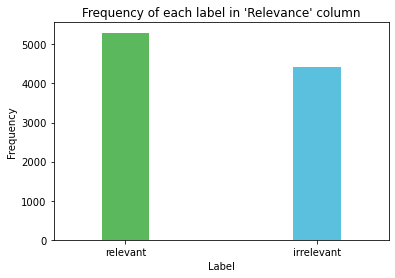

In [25]:
Data.Relevance.value_counts().plot(kind = 'bar',title=f"Frequency of each label in 'Relevance' column",xlabel='Label',ylabel='Frequency',width = 0.25,color=['#5cb85c','#5bc0de'],);
plt.xticks(rotation=0)
plt.savefig('Frequency_Relevance.pdf', format="pdf", bbox_inches="tight", dpi=100);



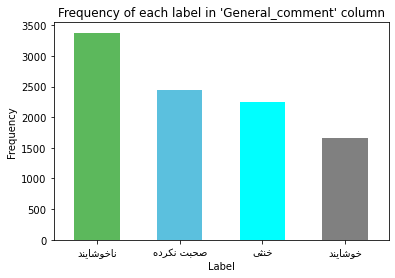

In [26]:
Data.General_comment.value_counts().plot(kind = 'bar',title=f"Frequency of each label in 'General_comment' column",xlabel='Label',ylabel='Frequency',width = 0.55,color=['#5cb85c','#5bc0de','cyan','gray']);
plt.xticks(rotation=0)
plt.savefig('Frequency_General.pdf', format="pdf", bbox_inches="tight", dpi=100);



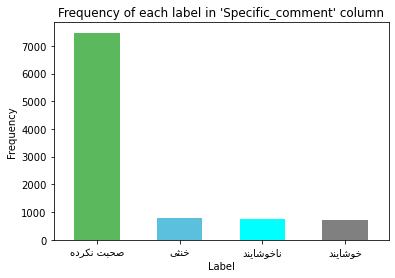

In [31]:
Data.Specific_comment.value_counts().plot(kind = 'bar',title=f"Frequency of each label in 'Specific_comment' column",xlabel='Label',ylabel='Frequency',width = 0.55,color=['#5cb85c','#5bc0de','cyan','gray'],fontsize=10);
plt.xticks(rotation=0)
plt.savefig('Frequency_Specific.pdf', format="pdf", bbox_inches="tight", dpi=100);



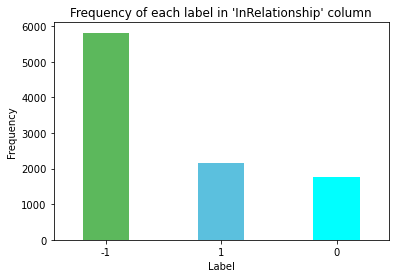

In [28]:
Data.InRelationship.value_counts().plot(kind = 'bar',title=f"Frequency of each label in 'InRelationship' column",xlabel='Label',ylabel='Frequency',width = 0.40,color=['#5cb85c','#5bc0de','cyan','gray']);
plt.xticks(rotation=0)
plt.savefig('Frequency_InRelationship.pdf', format="pdf", bbox_inches="tight", dpi=100);


-----------------------------

Wordcloud for label

In [ ]:
Data_ = pd.read_csv('Clean_2_data.csv',encoding ='utf-8')
Data_.drop(['Unnamed: 0'], axis=1,inplace=True)

In [101]:
text=Data_[Data_.General_comment=='ناخوشایند'].Record_text.reset_index(drop=True)
text

0                       زید خاکی بریز شوهر دوبار خاک بریز
1       دوست پسر کاسب ساعت   پیام میدین اوج بازاره دیوونه
2       شوهر تینا ترنر خواننده موفقی   زندگی مشترکشون ...
3                ازدواج فامیلای دید بازدید فامیلای همسرتم
4       بخدا هاری اصن پاچه میگرف مث هیچکی جرات نداش با...
                              ...                        
3373    ملکه همسرشون   زن ازدواج زنده گور میشدن برده ج...
3374    فاااااک زنه دوست دختر باشگاه تمرینای عادی پارک...
3375    تابستون سرکار تفریح گردش لباس مانتو شال نمیچسب...
3376    اوایل ازدواج دوستان همسرم مرام چپ صرف نهار دعو...
3377    شرایط مزخرف وضعیت اقتصادی سن ازدواج رفتع دیگع ...
Name: Record_text, Length: 3378, dtype: object

In [102]:
count={}
for i in range(len(text)):
    for i in text[i].split():
        if arabic_reshaper.reshape(i) not in count:
           count[arabic_reshaper.reshape(i)] = 1
        else:
           count[arabic_reshaper.reshape(i)] +=1

In [105]:
sorted_count_dict= dict(sorted(count.items(), key=lambda x:x[1],reverse=True)[:50])   # top 200 words
sorted_count_dict

{'ﺷﻮﻫﺮ': 1071,
 'ﺯﻥ': 645,
 'ﻫﻤﺴﺮ': 472,
 'ﺩﻭﺳﺖ': 386,
 'ﺍﺯﺩﻭﺍﺝ': 371,
 'ﭘﺎﺭﺗﻨﺮ': 303,
 'ﺧﻮﻧﻪ': 268,
 'ﺑﭽﻪ': 267,
 'ﺩﺧﺘﺮ': 211,
 'ﺯﻧﺪﮔﯽ': 206,
 'ﻣﺮﺩ': 184,
 'ﺯﻧﻢ': 175,
 'ﭘﺴﺮ': 155,
 'ﺷﻮﻫﺮﻡ': 154,
 'ﺷﻮﻫﺮﺵ': 141,
 'ﺭﺍﺑﻄﻪ': 139,
 'ﺧﺎﻧﻮﺍﺩﻩ': 137,
 'ﺯﻧﺖ': 136,
 'ﺩﺳﺖ': 131,
 'ﺍﺩﻡ': 127,
 'ﻫﻤﺴﺮﯼ': 124,
 'ﺷﻮﻫﺮﺕ': 112,
 'ﮐﻮﺩﮎ': 102,
 'ﻫﻤﺴﺮﻡ': 102,
 'ﺧﺎﻧﻢ': 100,
 'ﺧﺪﺍ': 98,
 'ﺧﯿﺎﻧﺖ': 94,
 'ﻫﻤﺴﺮﺵ': 92,
 'ﻃﻼﻕ': 87,
 'ﻣﯿﺨﻮﺍﻡ': 86,
 'ﭘﻮﻝ': 83,
 'ﺩﺧﺘﺮﻡ': 81,
 'ﭘﺎﺭﺗﻨﺮﻡ': 81,
 'ﭘﺴﺮﻡ': 79,
 'ﻋﯿﺪ': 79,
 'ﺩﻟﻢ': 78,
 'ﻣﺎﺩﺭ': 76,
 'ﺑﺰﻧﻢ': 72,
 'ﺍﺑﯽ': 71,
 'ﻭﻗﺖ': 67,
 'ﺳﮑﺲ': 67,
 'ﺍﻧﺘﺨﺎﺏ': 67,
 'ﺍﯾﺮﺍﻥ': 66,
 'ﻧﻈﺮ': 65,
 'ﺑﻘﯿﻪ': 64,
 'ﺑﺮﺍﻡ': 63,
 'ﺩﻭﺱ': 62,
 'ﻓﺎﻣﯿﻞ': 60,
 'ﺑﺎﺑﺎ': 59,
 'ﺧﺎﻧﻪ': 58}

(-0.5, 1599.5, 799.5, -0.5)

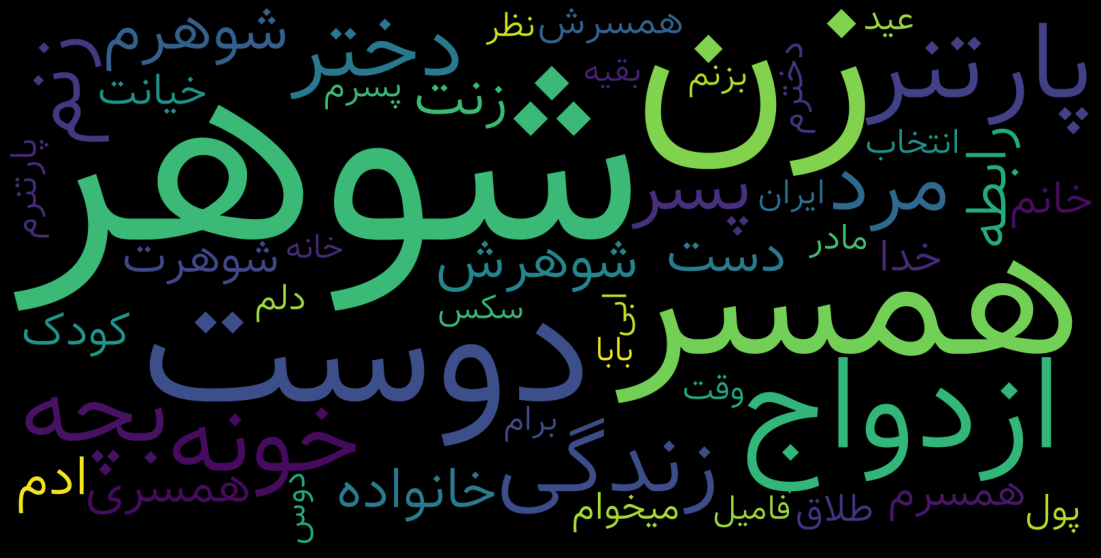

In [106]:
wordcloud = WordCloudFa( collocations=False, persian_normalize=True, include_numbers=False, width=1600, height=800)
wc = wordcloud.generate_from_frequencies(sorted_count_dict)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wc)
plt.axis("off")

----------------------------------

In [256]:
#TF_IDF
def tfidf_vectorizer(X_train,X_test):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test_vectors = tfidf_vectorizer.transform(X_test)
    return tfidf_train_vectors,tfidf_test_vectors


________________________________________________________________________________

In [257]:
#Splitting relevance column to train and test based on Record_text
X_train= train_ml['Record_text']
y_train = train_ml ['Relevance']
X_test = test_ml['Record_text']
y_test=test_ml['Relevance']

#Splitting InRelationship, General_comment and specific_comment column to train and test based on Record_text
X_train_related= train_related_ml['Record_text']
y_train_InRelationship= train_related_ml['InRelationship']
y_train_General_comment= train_related_ml['General_comment']
X_test_related= test_related_ml['Record_text']
y_test_InRelationship= test_related_ml['InRelationship']
y_test_General_comment= test_related_ml['General_comment']


X_train_specific_comment= train_related_specific_ml['Record_text']
y_train_Specific_comment= train_related_specific_ml['Specific_comment']
X_test_specific_comment= test_related_specific_ml['Record_text']
y_test_Specific_comment= test_related_specific_ml['Specific_comment']

In [259]:
tfidf_train_vectors_InRelationship,tfidf_test_vectors_InRelationship=tfidf_vectorizer(X_train_related,X_test_related)
smote = SMOTE(random_state=42)
X_train_InRelationship_sm, y_train_InRelationship_sm = smote.fit_resample(tfidf_train_vectors_InRelationship, y_train_InRelationship)

-----------------------

##Gridsearch

In [70]:
def KNN_Gridsearch(X_train,y_train,X_test,label):
    tfidf_train_vectors,tfidf_test_vectors=tfidf_vectorizer(X_train,X_test)

    KNN = KNeighborsClassifier()
    grid_search_knn = GridSearchCV(KNN,param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]},cv=5, n_jobs=-1, verbose=1, scoring = 'accuracy')
    grid_search_knn.fit(tfidf_train_vectors, y_train)
    print(f"best parameters of the model based on '{label}' Label are:'\n{grid_search_knn.best_params_}")

In [71]:
def SVM_Gridsearch(X_train,y_train,X_test,label):
    tfidf_train_vectors,tfidf_test_vectors=tfidf_vectorizer(X_train,X_test)
    svm =svm.SVC()
    GridSearch_svm = GridSearchCV(svm,param_grid={'kernel':['linear', 'poly', 'sigmoid'],'decision_function_shape':['ovo', 'ovr'], 'C':[1,5,10,20],'degree':[1,2,3,4,5,6]},n_jobs=-1, verbose=1, scoring = 'accuracy',cv = 5)
    GridSearch_svm.fit(tfidf_train_vectors, y_train)
    print(f"best parameters of the model based on '{label}' Label are:'\n{GridSearch_svm.best_params_}")


In [72]:
def Rfc_Grid_search(X_train,y_train,X_test,label):
  # # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)


    tfidf_train_vectors,tfidf_test_vectors=tfidf_vectorizer(X_train,X_test)
    rf = RandomForestClassifier()
    # smote = SMOTE(random_state=42)
    # tfidf_train_vectors, y_train = smote.fit_resample(tfidf_train_vectors, y_train)

    param_grid = {

        'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]
    }
    # Create a based model
    # Instantiate the grid search model
    grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 5, n_jobs = -1, verbose = 2)
    grid_search_rf.fit(tfidf_train_vectors, y_train)
    print(f"best parameters of the model based on '{label}' Label are:'\n{grid_search_rf.best_params_}")


In [73]:
def LR_Gridsearch(X_train,y_train,X_test,label):
  # tune parameters
    tfidf_train_vectors,tfidf_test_vectors=tfidf_vectorizer(X_train,X_test)
    lr =LogisticRegression(random_state = 42 )
    grid_search_lr = GridSearchCV(lr,param_grid={'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},return_train_score='False',cv=5)
    grid_search_lr.fit(tfidf_train_vectors, y_train)
    print(f"best parameters of the model based on '{label}' Label are:'\n{grid_search_lr.best_params_}")


# Relevance

In [74]:
KNN_Gridsearch(X_train,y_train,X_test,'Relevance')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best parameters of the model based on 'Relevance' Label are:'
{'n_neighbors': 9}


In [75]:
Rfc_Grid_search(X_train,y_train,X_test,'Relevance')


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [ ]:
SVM_Gridsearch(X_train,y_train,X_test,'Relevance')


Fitting 5 folds for each of 144 candidates, totalling 720 fits
best parameters of the model based on 'Relevance' Label are:'
{'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'linear'}


In [ ]:
LR_Gridsearch(X_train,y_train,X_test,'Relevance')


best parameters of the model based on 'Relevance' Label are:'
{'penalty': 'l2', 'solver': 'newton-cg'}


Models

In [260]:
def Train_Models(models,X_train,y_train,X_test):
    tfidf_train_vectors,tfidf_test_vectors=tfidf_vectorizer(X_train,X_test)
    preds = []
    for model in list(models.values()):
        model.fit(tfidf_train_vectors,y_train)
        # make predictions
        yhat = model.predict(tfidf_test_vectors)
        preds.append(yhat)
    return(preds)

In [261]:
def Evaluate_models(preds,models,y_test,label):
    for i in range(len(preds)):
        print(f":::::::::::::::Performance of'{list(models.keys())[i]}' Algorithm on '{label}' Label:::::::::::::::::::")
        print(list(models.keys())[i], classification_report(y_test, preds[i], zero_division=0))
        print(f'''Accuracy: {round(accuracy_score(y_test, preds[i], normalize=True),6)}
        \nPrecision:{round(precision_score(y_test, preds[i], average='macro'),6)}
        \nRecall: {round(recall_score(y_test, preds[i], average='macro'),6)}
        \nF1 score: {round(f1_score(y_test, preds[i], average='macro'),6)}''')
        print('\n')
        print('-----------------------------------------------------------------------------------------------------------')

In [262]:
models = {'KNN':KNeighborsClassifier(n_neighbors=9), 'RFC':RandomForestClassifier(bootstrap=True, max_depth= 80, max_features= 2, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 100),
'Naivebayes':MultinomialNB(),'SVM':svm.SVC(decision_function_shape= 'ovo', degree= 1,kernel='linear', C=1, gamma=1) , 'Logistic':LogisticRegression(max_iter=5000,  multi_class='multinomial',penalty= 'l2', solver= 'newton-cg')}

In [263]:
Evaluate_models(Train_Models(models,X_train, y_train,X_test),models,y_test,'Relevance')

:::::::::::::::Performance of'KNN' Algorithm on 'Relevance' Label:::::::::::::::::::
KNN               precision    recall  f1-score   support

           0       0.61      0.75      0.68      1146
           1       0.70      0.55      0.62      1217

    accuracy                           0.65      2363
   macro avg       0.66      0.65      0.65      2363
weighted avg       0.66      0.65      0.65      2363

Accuracy: 0.649598
        
Precision:0.658032
        
Recall: 0.652565
        
F1 score: 0.64739


-----------------------------------------------------------------------------------------------------------
:::::::::::::::Performance of'RFC' Algorithm on 'Relevance' Label:::::::::::::::::::
RFC               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1146
           1       0.52      1.00      0.68      1217

    accuracy                           0.52      2363
   macro avg       0.26      0.50      0.34      2363
weighted avg 

#InRelationship

In [ ]:
KNN_Gridsearch(X_train_related,y_train_InRelationship,X_test_related,'InRelationship')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best parameters of the model based on 'InRelationship' Label are:'
{'n_neighbors': 1}


In [ ]:
Rfc_Grid_search(X_train_related,y_train_InRelationship,X_test_related,'InRelationship')


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best parameters of the model based on 'InRelationship' Label are:'
{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


In [ ]:
SVM_Gridsearch(X_train_related,y_train_InRelationship,X_test_related,'InRelationship')


Fitting 5 folds for each of 144 candidates, totalling 720 fits
best parameters of the model based on 'InRelationship' Label are:'
{'C': 5, 'decision_function_shape': 'ovo', 'degree': 2, 'kernel': 'poly'}


In [ ]:
LR_Gridsearch(X_train_related,y_train_InRelationship,X_test_related,'InRelationship')


best parameters of the model based on 'InRelationship' Label are:'
{'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# over sampling


In [264]:
def Train_Models_InRelationship(models,X_train_related,y_train,X_test_related):
    preds = []
    tfidf_train_vectors_InRelationship,tfidf_test_vectors_InRelationship=tfidf_vectorizer(X_train_related,X_test_related)
    smote = SMOTE(random_state=42)
    X_train_InRelationship_sm, y_train_InRelationship_sm = smote.fit_resample(tfidf_train_vectors_InRelationship, y_train)
    #print(f"Frequency of each label in 'InRelationship' column after being balance:'\n{y_train_InRelationship_sm.value_counts()}")
    for model in list(models.values()):
        model.fit(X_train_InRelationship_sm,y_train_InRelationship_sm)
        # make predictions
        yhat = model.predict(tfidf_test_vectors_InRelationship)
        preds.append(yhat)
    return(preds)

In [265]:
models_InRelationship = {'KNN':KNeighborsClassifier(n_neighbors=1), 'RFC':RandomForestClassifier(bootstrap=True, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 1000),
'Naivebayes':MultinomialNB(),'SVM':svm.SVC(decision_function_shape= 'ovo', degree= 2,kernel='poly', C=5, gamma=1) , 'Logistic':LogisticRegression(max_iter=5000,  multi_class='multinomial',penalty= 'l2', solver= 'saga')}

In [266]:
Evaluate_models(Train_Models_InRelationship(models_InRelationship,X_train_related, y_train_InRelationship,X_test_related),models_InRelationship,y_test_InRelationship,'InRelationship')


:::::::::::::::Performance of'KNN' Algorithm on 'InRelationship' Label:::::::::::::::::::
KNN               precision    recall  f1-score   support

          -1       0.70      0.22      0.33       646
           0       0.07      0.55      0.12        51
           1       0.55      0.65      0.60       518

    accuracy                           0.42      1215
   macro avg       0.44      0.47      0.35      1215
weighted avg       0.61      0.42      0.44      1215

Accuracy: 0.41893
        
Precision:0.440659
        
Recall: 0.474425
        
F1 score: 0.352724


-----------------------------------------------------------------------------------------------------------
:::::::::::::::Performance of'RFC' Algorithm on 'InRelationship' Label:::::::::::::::::::
RFC               precision    recall  f1-score   support

          -1       0.73      0.47      0.57       646
           0       0.09      0.08      0.08        51
           1       0.53      0.77      0.63       518

   

#General_comment

In [ ]:
KNN_Gridsearch(X_train_related,y_train_General_comment,X_test_related,'General_comment')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best parameters of the model based on 'General_comment' Label are:'
{'n_neighbors': 10}


In [ ]:
Rfc_Grid_search(X_train_related,y_train_General_comment,X_test_related,'General_comment')


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best parameters of the model based on 'General_comment' Label are:'
{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
SVM_Gridsearch(X_train_related,y_train_General_comment,X_test_related,'General_comment')


Fitting 5 folds for each of 144 candidates, totalling 720 fits
best parameters of the model based on 'General_comment' Label are:'
{'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'linear'}


In [ ]:
LR_Gridsearch(X_train_related,y_train_General_comment,X_test_related,'General_comment')


best parameters of the model based on 'General_comment' Label are:'
{'penalty': 'l2', 'solver': 'saga'}


In [267]:
models_General_comment = {'KNN':KNeighborsClassifier(n_neighbors=9), 'RFC':RandomForestClassifier(),'Naivebayes':MultinomialNB(),'SVM':svm.SVC(kernel='linear', C=1, gamma=1) , 'Logistic':LogisticRegression(max_iter=5000,  multi_class='multinomial')}


In [268]:
Evaluate_models(Train_Models(models_General_comment,X_train_related, y_train_General_comment,X_test_related),models_General_comment,y_test_General_comment,'General_comment')

:::::::::::::::Performance of'KNN' Algorithm on 'General_comment' Label:::::::::::::::::::
KNN               precision    recall  f1-score   support

           0       0.38      0.36      0.37       266
           1       0.60      0.52      0.56       571
           2       0.37      0.46      0.41       378

    accuracy                           0.47      1215
   macro avg       0.45      0.45      0.45      1215
weighted avg       0.48      0.47      0.47      1215

Accuracy: 0.466667
        
Precision:0.450681
        
Recall: 0.446822
        
F1 score: 0.44634


-----------------------------------------------------------------------------------------------------------
:::::::::::::::Performance of'RFC' Algorithm on 'General_comment' Label:::::::::::::::::::
RFC               precision    recall  f1-score   support

           0       0.56      0.21      0.30       266
           1       0.57      0.80      0.66       571
           2       0.48      0.40      0.44       378

 

#Specific_comment

In [ ]:
KNN_Gridsearch(X_train_specific_comment,y_train_Specific_comment,X_test_specific_comment,'Specific_comment')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best parameters of the model based on 'Specific_comment' Label are:'
{'n_neighbors': 10}


In [ ]:
Rfc_Grid_search(X_train_specific_comment,y_train_Specific_comment,X_test_specific_comment,'Specific_comment')


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best parameters of the model based on 'Specific_comment' Label are:'
{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
SVM_Gridsearch(X_train_specific_comment,y_train_Specific_comment,X_test_specific_comment,'Specific_comment')


Fitting 5 folds for each of 144 candidates, totalling 720 fits
best parameters of the model based on 'Specific_comment' Label are:'
{'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'linear'}


In [ ]:
LR_Gridsearch(X_train_specific_comment,y_train_Specific_comment,X_test_specific_comment,'Specific_comment')


best parameters of the model based on 'Specific_comment' Label are:'
{'penalty': 'l2', 'solver': 'saga'}


In [269]:
models_specific_comment = {'KNN':KNeighborsClassifier(n_neighbors=10), 'RFC':RandomForestClassifier(),
'Naivebayes':MultinomialNB(),'SVM':svm.SVC(decision_function_shape= 'ovo', degree= 1,kernel='linear', C=1, gamma=1) , 'Logistic':LogisticRegression(max_iter=5000,  multi_class='multinomial',penalty= 'l2', solver= 'saga')}

In [270]:
Evaluate_models(Train_Models(models_specific_comment,X_train_specific_comment, y_train_Specific_comment,X_test_specific_comment),models_specific_comment,y_test_Specific_comment,'Specific_comment')

:::::::::::::::Performance of'KNN' Algorithm on 'Specific_comment' Label:::::::::::::::::::
KNN               precision    recall  f1-score   support

           0       0.40      0.44      0.42       169
           1       0.49      0.26      0.34       179
           2       0.40      0.55      0.46       193

    accuracy                           0.42       541
   macro avg       0.43      0.41      0.41       541
weighted avg       0.43      0.42      0.41       541

Accuracy: 0.417745
        
Precision:0.432998
        
Recall: 0.414692
        
F1 score: 0.407191


-----------------------------------------------------------------------------------------------------------
:::::::::::::::Performance of'RFC' Algorithm on 'Specific_comment' Label:::::::::::::::::::
RFC               precision    recall  f1-score   support

           0       0.44      0.47      0.45       169
           1       0.59      0.42      0.49       179
           2       0.49      0.60      0.54       193

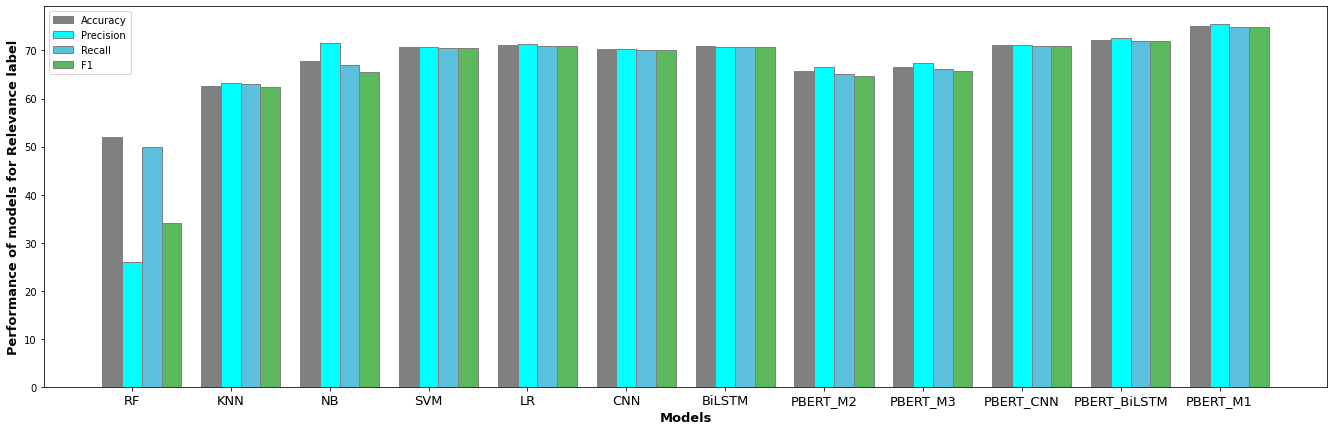

In [29]:
barWidth = 0.20
fig = plt.subplots(figsize =(23, 7))
 
# set height of bar
Accuracy_list = [51.90,62.64,67.73,70.66,71.17,70.35,70.8633,65.68,66.6,71.07,72.25,75.18 ]
Precision_list = [25.95, 63.28,71.51,70.71,71.30,70.40,70.8223,66.66,67.48,71.11,72.69,75.43]
Recall_list = [50.0, 62.96,66.97,70.47,70.95,70.16,70.827,65.11,66.08,70.89,71.93,74.81]
F1_list = [34.17, 62.50,65.54,70.49,70.96,70.18,70.8245,64.62,65.71,70.91,71.90,74.83]

 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

 
# Make the plot
plt.bar(br1, Accuracy_list, color ='gray', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Precision_list, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br3, Recall_list, color ='#5bc0de', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br4, F1_list, color ='#5cb85c', width = barWidth,
        edgecolor ='grey', label ='F1')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 13)
plt.ylabel('Performance of models for Relevance label', fontweight ='bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(Accuracy_list))],
        ['RF', 'KNN', 'NB','SVM','LR','CNN','BiLSTM','PBERT_M2','PBERT_M3','PBERT_CNN','PBERT_BiLSTM','PBERT_M1'],fontsize = 13)
 
plt.legend()
plt.savefig('Relevance_performance_metrics.pdf', format="pdf", bbox_inches="tight", dpi=100)
plt.show()


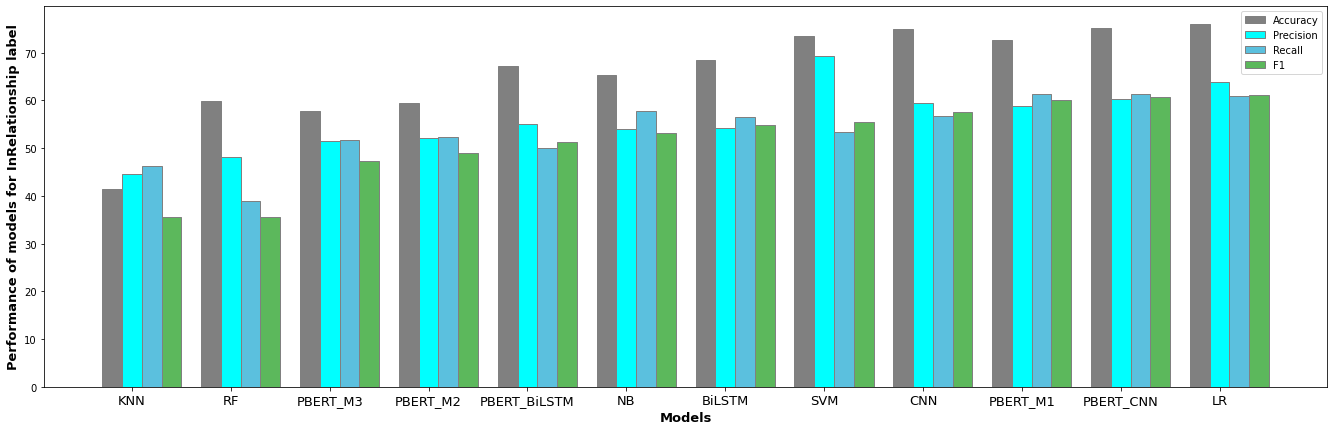

In [28]:
barWidth = 0.20
fig = plt.subplots(figsize =(23, 7))
 
# set height of bar
Accuracy_InRelationship = [41.43,59.97,57.83,59.47,67.29,65.31,68.48,73.44,74.93,72.55,75.22,75.92 ]
Precision_InRelationship = [44.59,48.12,51.56,52.18,55.05,54.10,54.29,69.30,59.45,58.93,60.29,63.95]
Recall_InRelationship = [46.36,38.88,51.68,52.37,50.01,57.83,56.44,53.46,56.75,61.36,61.39,60.94]
F1_InRelationship = [35.58,35.64,47.37,48.92,51.2,53.22,54.90,55.39,57.59,60.0,60.73,61.13]

 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy_InRelationship))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

 
# Make the plot
plt.bar(br1, Accuracy_InRelationship, color ='gray', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Precision_InRelationship, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br3, Recall_InRelationship, color ='#5bc0de', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br4, F1_InRelationship, color ='#5cb85c', width = barWidth,
        edgecolor ='grey', label ='F1')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 13)
plt.ylabel('Performance of models for InRelationship label', fontweight ='bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(Accuracy_InRelationship))],
        ['KNN', 'RF', 'PBERT_M3','PBERT_M2','PBERT_BiLSTM','NB','BiLSTM','SVM','CNN','PBERT_M1','PBERT_CNN','LR'],fontsize = 13)
 
plt.legend()
plt.savefig('InRelationship_performance_metrics.pdf', format="pdf", bbox_inches="tight", dpi=100)
plt.show()


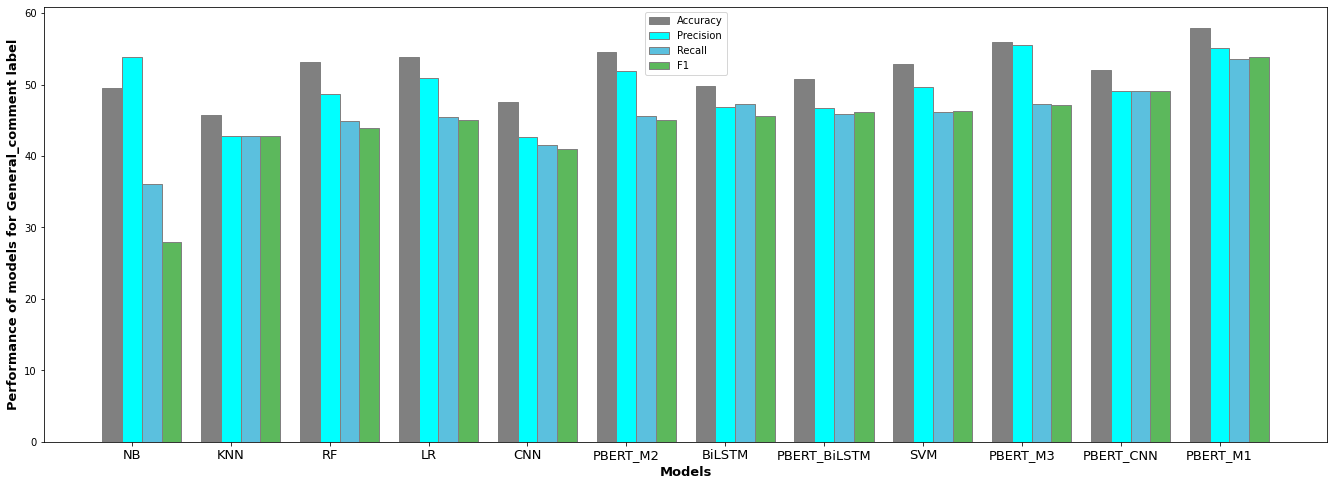

In [31]:
barWidth = 0.20
fig = plt.subplots(figsize =(23, 8))
 
# set height of bar
Accuracy_General = [49.56,45.69,53.12,53.92,47.57,54.51,49.85,50.84,52.83,55.97,52.03,57.98 ]
Precision_General  = [53.86,42.87,48.72,50.88,42.64,51.93,46.87,46.77,49.72,55.59,49.11,55.09]
Recall_General  = [36.11,42.83,44.92,45.48,41.58,45.62,47.22,45.92,46.12,47.30,49.11,53.54]
F1_General = [27.98,42.75,43.87,45.0,41.04,45.02,45.63,46.10,46.33,47.17,49.09,53.87]

 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy_General))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

 
# Make the plot
plt.bar(br1, Accuracy_General, color ='gray', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Precision_General, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br3, Recall_General, color ='#5bc0de', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br4, F1_General, color ='#5cb85c', width = barWidth,
        edgecolor ='grey', label ='F1')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 13)
plt.ylabel('Performance of models for General_comment label', fontweight ='bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(Accuracy_General))],
        ['NB', 'KNN','RF', 'LR','CNN','PBERT_M2','BiLSTM','PBERT_BiLSTM','SVM','PBERT_M3','PBERT_CNN','PBERT_M1'],fontsize = 13)
 
plt.legend(loc="best")
plt.savefig('General_performance_metrics.pdf', format="pdf", bbox_inches="tight", dpi=100)
plt.show()

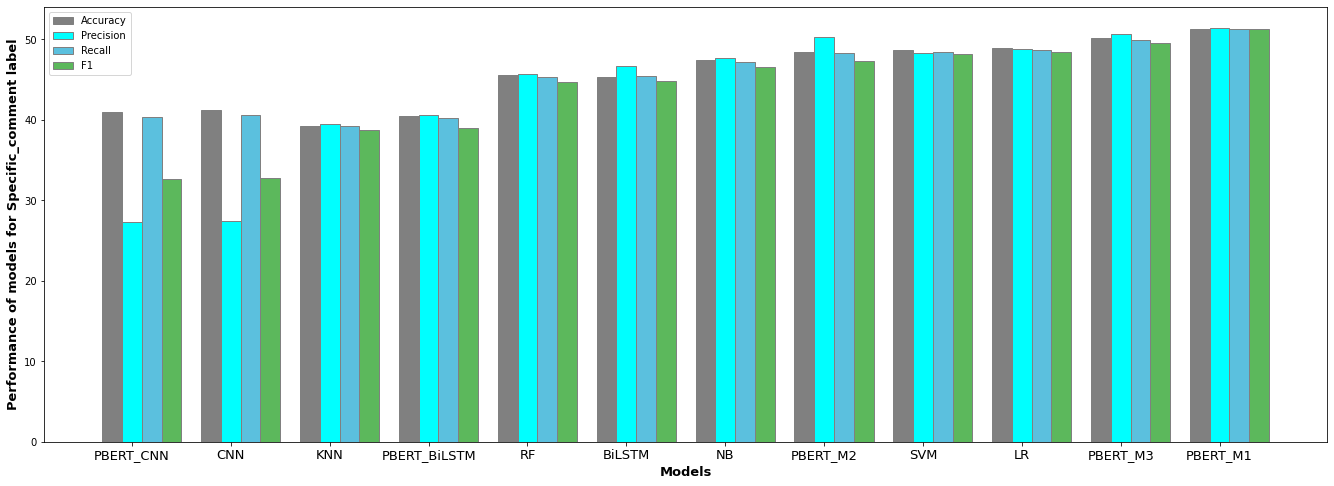

In [32]:
barWidth = 0.20
fig = plt.subplots(figsize =(23, 8))
 
# set height of bar
Accuracy_Specific = [40.96,41.21,39.28,40.48,45.54,45.30,47.47,48.43,48.68,48.92,50.12,51.33 ]
Precision_Specific  = [27.31,27.47,39.47,40.59,45.64,46.7,47.66,50.31,48.32,48.78,50.69,51.44]
Recall_Specific  = [40.34,40.57,39.28,40.16,45.34,45.42,47.18,48.24,48.47,48.72,49.93,51.28]
F1_Specific = [32.58,32.76,38.74,38.92,44.69,44.87,46.49,47.35,48.17,48.43,49.54,51.32]

 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy_Specific))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

 
# Make the plot
plt.bar(br1, Accuracy_Specific, color ='gray', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Precision_Specific, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br3, Recall_Specific, color ='#5bc0de', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br4, F1_Specific, color ='#5cb85c', width = barWidth,
        edgecolor ='grey', label ='F1')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 13)
plt.ylabel('Performance of models for Specific_comment label', fontweight ='bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(Accuracy_Specific))],
        ['PBERT_CNN','CNN', 'KNN','PBERT_BiLSTM', 'RF','BiLSTM','NB','PBERT_M2','SVM','LR','PBERT_M3','PBERT_M1'],fontsize = 13)
 
plt.legend(loc="best")
plt.savefig('Specific_performance_metrics.pdf', format="pdf", bbox_inches="tight", dpi=100)
plt.show()